In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
train = zipfile.ZipFile("/content/drive/MyDrive/AI突擊!/crop_224_train.zip")
train.extractall("datas")
test = zipfile.ZipFile("/content/drive/MyDrive/AI突擊!/crop_224_test.zip")
test.extractall("datas")
validation = zipfile.ZipFile("/content/drive/MyDrive/AI突擊!/crop_224_validation.zip")
validation.extractall("datas")

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

train_dir = 'datas/crop_224_train'
d = {folder:idx for idx, folder in enumerate(os.listdir(train_dir))}
classes = list(d)

img_files = []
labels = []
for folder in os.listdir(train_dir):
    for img_file in os.listdir(os.path.join(train_dir, folder)):
        img_files.append(os.path.join(train_dir, folder, img_file))
        labels.append(folder)

df_train = pd.DataFrame({
    'path': img_files,
    'ans': labels
})

df_train["ans"] = df_train["ans"].replace(d) 
df_train

,path,ans
0,datas/crop_224_train/betel/b41d4f29-3c78-4b74-...,0
1,datas/crop_224_train/betel/6624282a-d06a-4775-...,0
2,datas/crop_224_train/betel/7358cc9c-c0ee-4038-...,0
3,datas/crop_224_train/betel/418eea1f-79ad-40b2-...,0
4,datas/crop_224_train/betel/a2d0809a-2c81-4f18-...,0
...,...,...
40907,datas/crop_224_train/tea/10af2dce-6f55-4e4e-b6...,32
40908,datas/crop_224_train/tea/746d1193-b15e-43a8-a7...,32
40909,datas/crop_224_train/tea/deb9257c-2bc6-44be-8b...,32
40910,datas/crop_224_train/tea/70fd7c52-006e-44bf-81...,32


In [ ]:
test_dir = 'datas/crop_224_validation'

img_files = []
labels = []
for folder in os.listdir(test_dir):
    for img_file in os.listdir(os.path.join(test_dir, folder)):
        img_files.append(os.path.join(test_dir, folder, img_file))
        labels.append(folder)

df_test = pd.DataFrame({
    'path': img_files,
    'ans': labels
})

df_test["ans"] = df_test["ans"].replace(d) 
df_test

,path,ans
0,datas/crop_224_validation/betel/67f48ba8-3cb6-...,0
1,datas/crop_224_validation/betel/df527392-27f1-...,0
2,datas/crop_224_validation/betel/e7b929ad-3ee1-...,0
3,datas/crop_224_validation/betel/9ea4be7e-dacd-...,0
4,datas/crop_224_validation/betel/a14d8535-7d87-...,0
...,...,...
3295,datas/crop_224_validation/tea/6d3a600b-d6cc-4e...,32
3296,datas/crop_224_validation/tea/19a44ae2-e858-44...,32
3297,datas/crop_224_validation/tea/c9db872c-b04e-48...,32
3298,datas/crop_224_validation/tea/e363c0c5-186a-40...,32


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
x_train = np.array(df_train["path"])
y_train = np.array(df_train["ans"])
y_train = to_categorical(y_train, num_classes=33)

x_test = np.array(df_test["path"])
y_test = np.array(df_test["ans"])
y_test = to_categorical(y_test, num_classes=33)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40912,)
(40912, 33)
(3300,)
(3300, 33)


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
# -----------------------------3.設置資料集--------------------------------
# 設定ImageDataGenerator參數(路徑、批量、圖片尺寸)
train_dir = 'datas/crop_224_train'
valid_dir = 'datas/crop_224_validation'
test_dir = 'datas/crop_224_test'
batch_size = 32
target_size = (224, 224)

# 設定批量生成器
train_datagen = ImageDataGenerator(rescale=1./255, 
                  rotation_range=20,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2, 
                  zoom_range=0.5,
                  fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# 讀取資料集+批量生成器，產生每epoch訓練樣本
train_generator = train_datagen.flow_from_directory(train_dir,
                          target_size=target_size,
                          batch_size=batch_size)

valid_generator = val_datagen.flow_from_directory(valid_dir,
                          target_size=target_size,
                          batch_size=batch_size)

test_generator = test_datagen.flow_from_directory(test_dir,
                          target_size=target_size,
                          batch_size=batch_size,
                          shuffle=False)

Found 40912 images belonging to 33 classes.
Found 3300 images belonging to 33 classes.
Found 3300 images belonging to 33 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.losses import CategoricalCrossentropy


def build_model(preModel=ResNet50, num_classes=33):
    
    pred_model = preModel(include_top=False, weights='imagenet',
                          input_shape=(224, 224, 3),
                          pooling='max', classifier_activation='softmax')
    
    output_layer = Dense(num_classes, activation="softmax", name="output_layer")

    model = Model(pred_model.inputs, output_layer(pred_model.output))

    model.compile(optimizer="adam",loss=CategoricalCrossentropy(), metrics=['accuracy'])

    return model

model=build_model()

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
# ---------------------------2.設置callbacks----------------------------
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# 設定earlystop條件
estop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# 設定模型儲存條件
checkpoint = ModelCheckpoint('Densenet201_checkpoint_v2.h5', verbose=1,
                          monitor='val_loss', save_best_only=True,
                          mode='min')

# 設定lr降低條件(0.001 → 0.0002 → 0.00004 → 0.00001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                           patience=5, mode='min', verbose=1,
                           min_lr=1e-4)

In [ ]:
logs = model.fit(train_generator,
          epochs=50,
          validation_data=valid_generator,
          callbacks=[checkpoint, estop, reduce_lr]
          )

Epoch 1/50
1279/1279 [==============================] - ETA: 0s - loss: 0.8872 - accuracy: 0.7241
Epoch 1: val_loss did not improve from 1.52859
1279/1279 [==============================] - 463s 362ms/step - loss: 0.8872 - accuracy: 0.7241 - val_loss: 2.2629 - val_accuracy: 0.5276 - lr: 0.0010
Epoch 2/50
1279/1279 [==============================] - ETA: 0s - loss: 0.8412 - accuracy: 0.7381
Epoch 2: val_loss did not improve from 1.52859
1279/1279 [==============================] - 462s 361ms/step - loss: 0.8412 - accuracy: 0.7381 - val_loss: 4.6502 - val_accuracy: 0.2718 - lr: 0.0010
Epoch 3/50
1279/1279 [==============================] - ETA: 0s - loss: 0.8079 - accuracy: 0.7484
Epoch 3: val_loss did not improve from 1.52859
1279/1279 [==============================] - 457s 357ms/step - loss: 0.8079 - accuracy: 0.7484 - val_loss: 3.0466 - val_accuracy: 0.4276 - lr: 0.0010
Epoch 4/50
1279/1279 [==============================] - ETA: 0s - loss: 0.7798 - accuracy: 0.7573
Epoch 4: val_loss

已儲存Densenet201_retrained_v2.h5


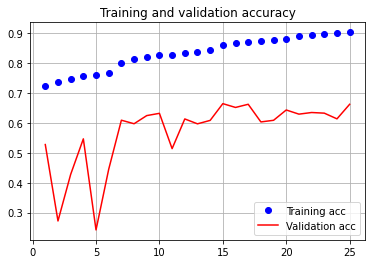

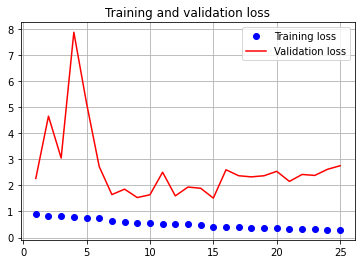

In [ ]:
# -----------------------5.儲存模型、紀錄學習曲線------------------------
import matplotlib.pyplot as plt
# 儲存模型
model.save('ResNet_retrained_v2.h5')
print('已儲存Densenet201_retrained_v2.h5')

# 畫出acc學習曲線
acc = logs.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = logs.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.grid()
# 儲存acc學習曲線
plt.savefig('./acc.png')
plt.show()

# 畫出loss學習曲線
loss = logs.history['loss']
val_loss = logs.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.grid()
# 儲存loss學習曲線
plt.savefig('loss.png')
plt.show()

In [ ]:
# -------------------------6.驗證模型準確度--------------------------
# 以vali資料夾驗證模型準確度
test_loss, test_acc = model.evaluate_generator(test_generator,
                            steps=test_generator.samples//batch_size,
                            verbose=1)
print('test acc:', test_acc)
print('test loss:', test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """


103/103 [==============================] - 11s 105ms/step - loss: 2.7524 - accuracy: 0.6493
test acc: 0.6492718458175659
test loss: 2.75243878364563
